In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
base_path = 'output_dqn'
df_hue_all = pd.DataFrame()
version_name_mapping = {'nat':'vanilla',
                        'adv':'adversarial',
                        'cov':'robust'}

for folder_version in os.listdir(base_path):
    
    path_version = os.path.join(base_path, folder_version)
    version_name = version_name_mapping[folder_version.split('_')[-1]]
    experiment_folder = sorted(os.listdir(path_version))[-1]
    path_experiment = os.path.join(path_version, experiment_folder)
    path_csv_files = os.path.join(path_experiment, 'csvs')
    file_tests = [f for f in os.listdir(path_csv_files) if f.split('_')[0]=='test']

    df_hue = pd.DataFrame()
    for file in file_tests:
        attack_type = file.split('.')[0].split('_')[-1]
        df = pd.read_csv(os.path.join(path_csv_files, file), index_col=0)
        rewards = df['rewards']
        df_hue[f'{attack_type}'] = rewards.values
    df_hue['version'] = version_name
    df_hue_all = pd.concat([df_hue_all, df_hue])
df_hue_all


version_order = ['vanilla', 'adversarial', 'robust']
df_hue_all['version'] = pd.Categorical(df_hue_all['version'], categories=version_order, ordered=True)
df_hue_all = df_hue_all.sort_values('version')

df_hue_all = df_hue_all.rename(columns={'normal': 'No Attack', 'attack': 'PGD'})


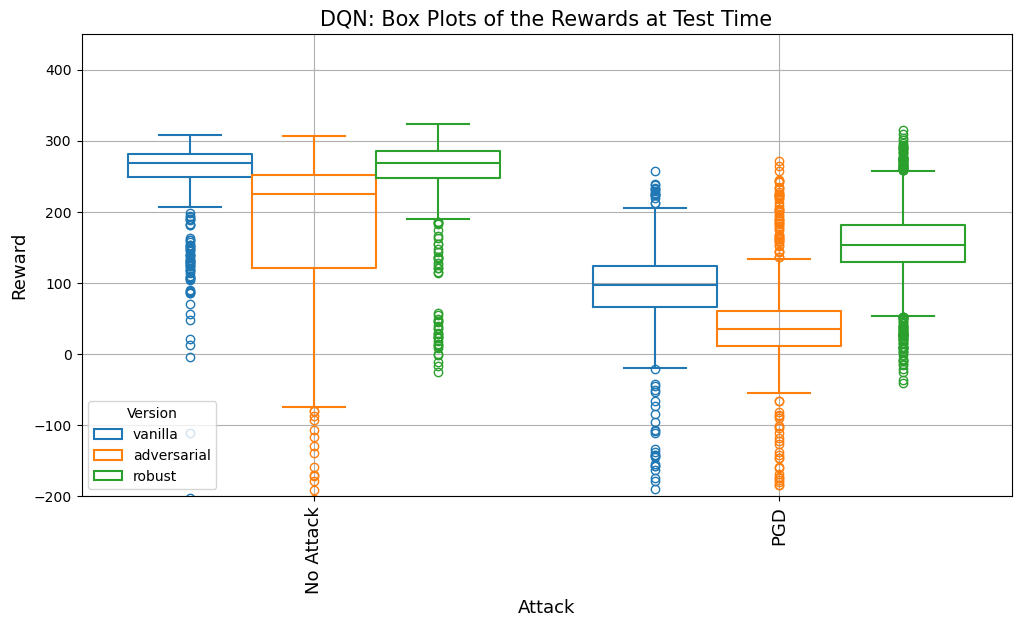

In [3]:
df_long = pd.melt(df_hue_all, id_vars=['version'], var_name='Method', value_name='Value')

# Creating box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Value', hue='version',
            data=df_long, fill=False)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel('Reward', fontsize=13)
plt.xlabel('Attack', fontsize=13)
plt.title('DQN: Box Plots of the Rewards at Test Time', fontsize=15)
plt.grid(True)
plt.ylim([-200, 450])

# Set the location of the legend
plt.legend(loc='lower left', title='Version')

plt.show()


In [4]:
selected_columns = ['No Attack', 'PGD']
df_different_attacks = df_hue_all[selected_columns + ['version']]

df_different_attacks_vanilla = df_different_attacks[df_different_attacks['version']=='vanilla']
means = df_different_attacks_vanilla[selected_columns].mean(axis=0)
medians = df_different_attacks_vanilla[selected_columns].median(axis=0)
stds = df_different_attacks_vanilla[selected_columns].std(axis=0)
vanilla_overview = pd.DataFrame([means, medians, stds], index=['mean_vanilla', 'median_vanilla', 'std_vanilla']).T

df_different_attacks_adversarial = df_different_attacks[df_different_attacks['version']=='adversarial']
means = df_different_attacks_adversarial[selected_columns].mean(axis=0)
medians = df_different_attacks_adversarial[selected_columns].median(axis=0)
stds = df_different_attacks_adversarial[selected_columns].std(axis=0)
adversarial_overview = pd.DataFrame([means, medians, stds], index=['mean_adversarial', 'median_adversarial', 'std_adversarial']).T

df_different_attacks_robust = df_different_attacks[df_different_attacks['version']=='robust']
means = df_different_attacks_robust[selected_columns].mean(axis=0)
medians = df_different_attacks_robust[selected_columns].median(axis=0)
stds = df_different_attacks_robust[selected_columns].std(axis=0)
robust_overview = pd.DataFrame([means, medians, stds], index=['mean_robust', 'median_robust', 'std_robust']).T

overview = pd.concat([vanilla_overview, adversarial_overview, robust_overview], axis=1)
overview[['mean_vanilla', 'mean_adversarial', 'mean_robust',
          'median_vanilla', 'median_adversarial', 'median_robust',
          'std_vanilla', 'std_adversarial','std_robust']]

,mean_vanilla,mean_adversarial,mean_robust,median_vanilla,median_adversarial,median_robust,std_vanilla,std_adversarial,std_robust
No Attack,245.610961,150.615775,252.401546,267.843913,224.284392,268.895503,79.762135,153.694265,63.408452
PGD,80.385658,36.144638,152.859754,96.846039,34.808214,152.931053,90.296451,87.981184,72.084118


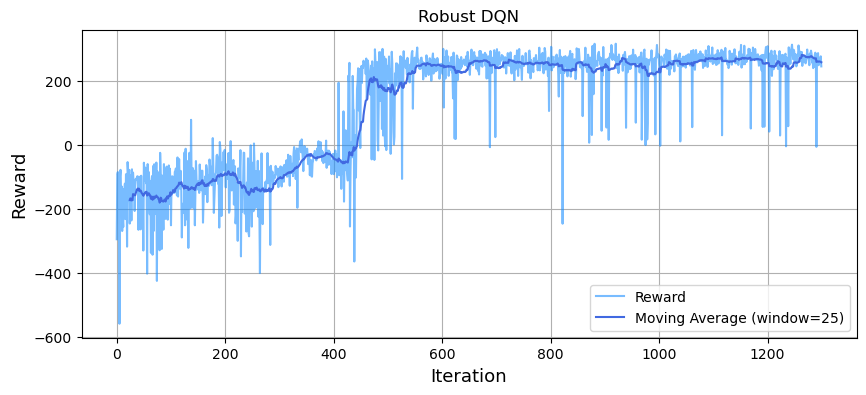

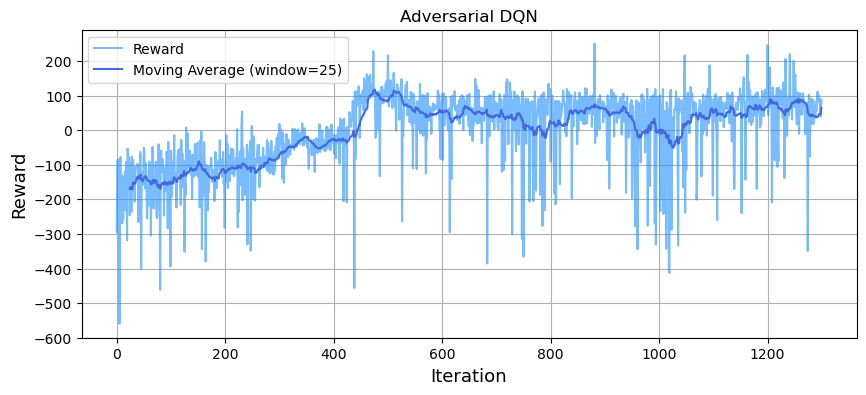

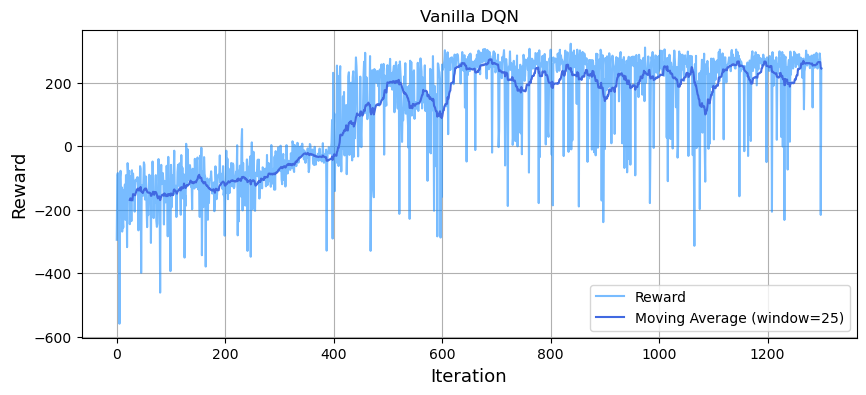

In [33]:
import numpy as np
base_path = 'output_dqn'
df_hue_all = pd.DataFrame()
version_name_mapping = {'nat':'vanilla',
                        'adv':'adversarial',
                        'cov':'robust'}

for folder_version in os.listdir(base_path):
    
    path_version = os.path.join(base_path, folder_version)
    version_name = version_name_mapping[folder_version.split('_')[-1]]
    experiment_folder = sorted(os.listdir(path_version))[-1]
    path_experiment = os.path.join(path_version, experiment_folder)
    path_csv_files = os.path.join(path_experiment, 'csvs')
    file_tests = [f for f in os.listdir(path_csv_files) if f.split('_')[0]=='test']

    attack_type = file.split('.')[0].split('_')[-1]
    df = pd.read_csv(os.path.join(path_csv_files, 'rewards.csv'), index_col=0)
    rewards = df['rewards']

    plt.figure(figsize=(10,4))

    plt.plot(rewards, color='dodgerblue', alpha=0.6)
    window_size = 25
    ma = np.convolve(rewards, np.ones(window_size) / window_size, mode='valid')
    nans = np.full(window_size - 1, np.nan)
    ma = np.concatenate((nans, ma))
    plt.plot(ma, color='royalblue')
    plt.title(version_name.capitalize()  + ' DQN')
    plt.xlabel('Iteration', fontsize=13)
    plt.ylabel('Reward', fontsize=13)
    plt.grid()
    plt.legend(['Reward', f'Moving Average (window={window_size})'])

    